Imports

In [47]:
import pandas as pd

pumpkins = pd.read_csv("../data/US-pumpkins.csv")

#filters out any non-bushel Package
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
#prints first few rows of the dataset
pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [48]:
#How many cells in each column are empty
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [49]:
new_columns = ['Package', 'Month', 'Low Price','High Price','Date']

pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

pumpkins.head()

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.0,15.0
71,1 1/9 bushel cartons,9/24/16,18.0,18.0
72,1 1/9 bushel cartons,10/1/16,18.0,18.0
73,1 1/9 bushel cartons,10/1/16,17.0,17.0
74,1 1/9 bushel cartons,10/8/16,15.0,15.0


In [50]:
price = (pumpkins['Low Price']+ pumpkins['High Price'])/2

month = pd.DatetimeIndex(pumpkins['Date']).month

refined_data = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Price': price})

refined_data.loc[refined_data['Package'].str.contains('1 1/9'), 'Price'] = price/(1+ 1/9)

refined_data.loc[refined_data['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

print(refined_data)

      Month               Package  Price
70        9  1 1/9 bushel cartons  13.50
71        9  1 1/9 bushel cartons  16.20
72       10  1 1/9 bushel cartons  16.20
73       10  1 1/9 bushel cartons  15.30
74       10  1 1/9 bushel cartons  13.50
...     ...                   ...    ...
1738      9    1/2 bushel cartons  30.00
1739      9    1/2 bushel cartons  28.75
1740      9    1/2 bushel cartons  25.75
1741      9    1/2 bushel cartons  24.00
1742      9    1/2 bushel cartons  24.00

[415 rows x 3 columns]


[]

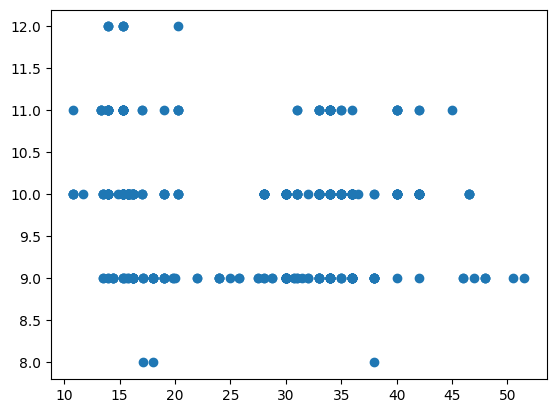

In [51]:
#scatter plot
import matplotlib.pyplot as plt

price = refined_data.Price
month = refined_data.Month

plt.scatter(price, month)
plt.plot()

Text(0, 0.5, 'Pumpkin price')

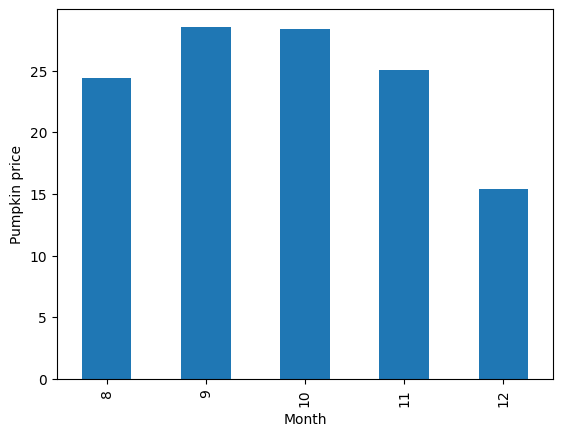

In [52]:
#bar graph
refined_data.groupby(['Month'])['Price'].mean().plot(kind='bar')

plt.ylabel("Pumpkin price")